# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

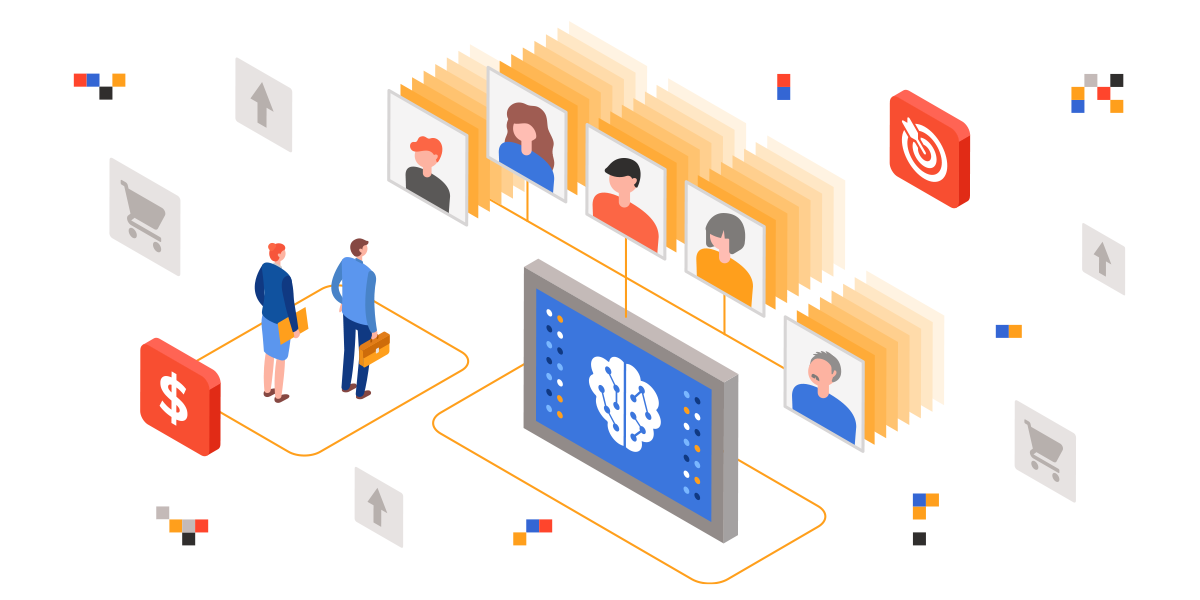

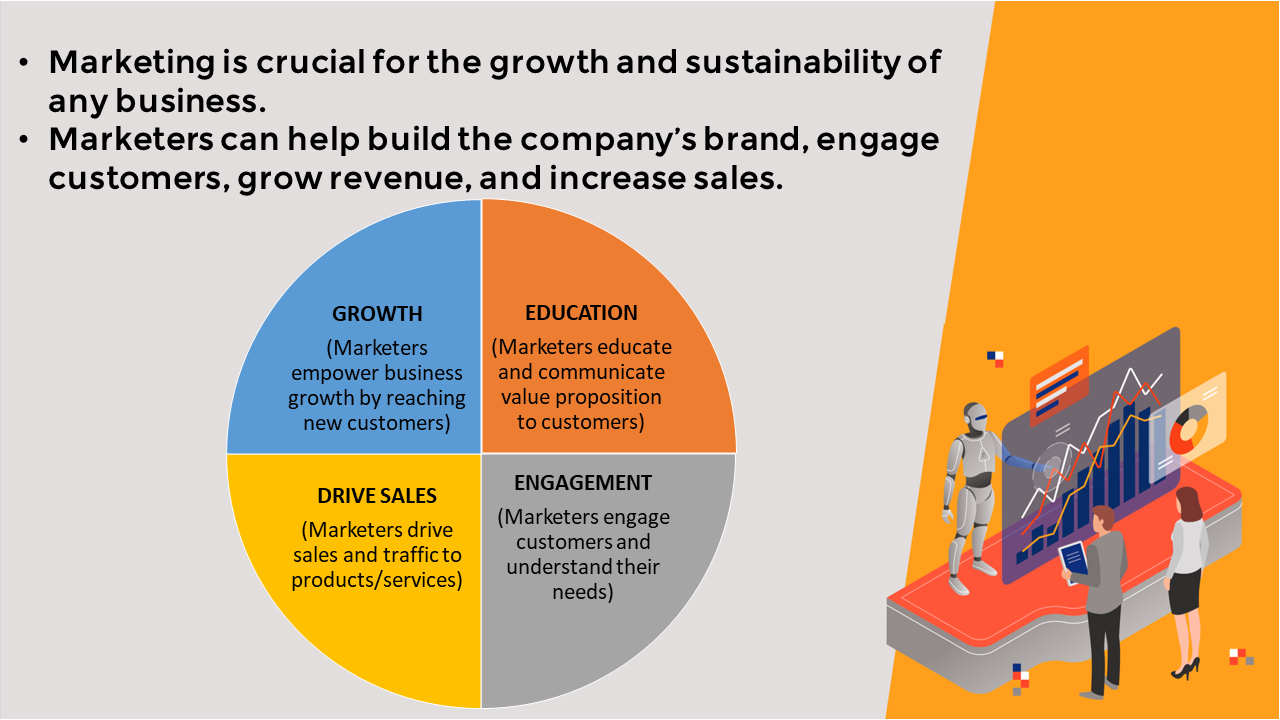

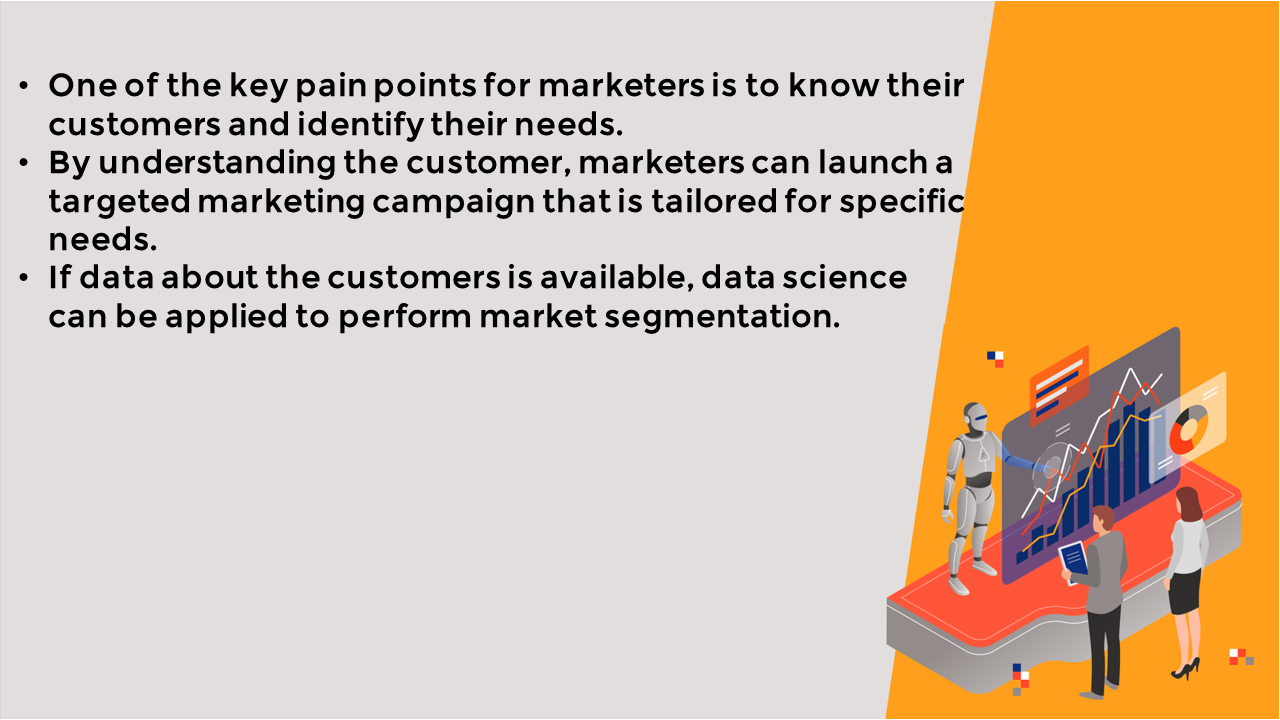

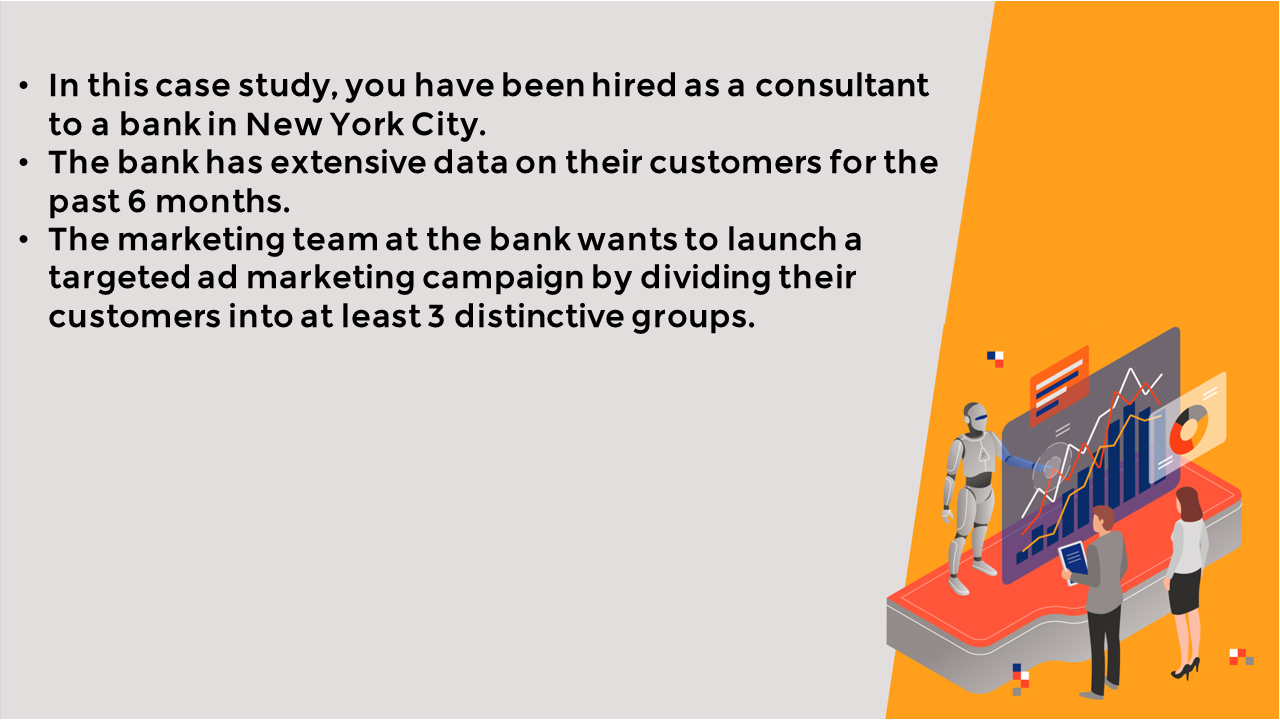

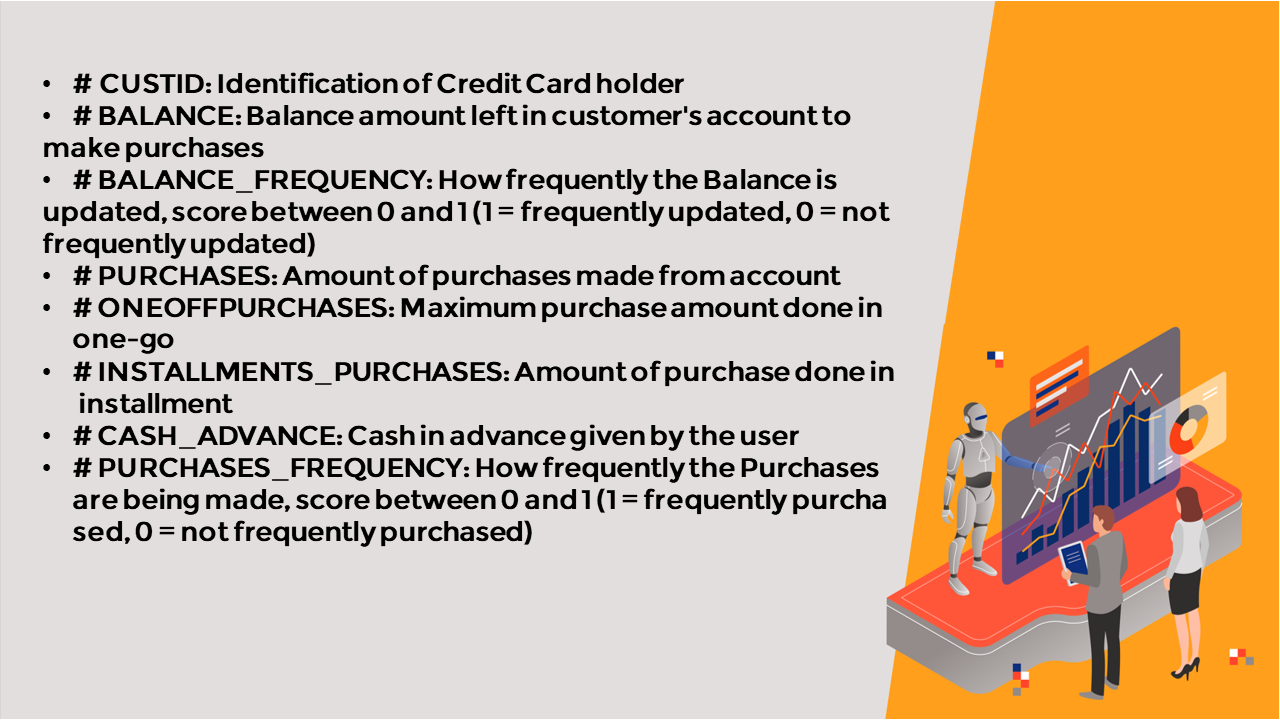

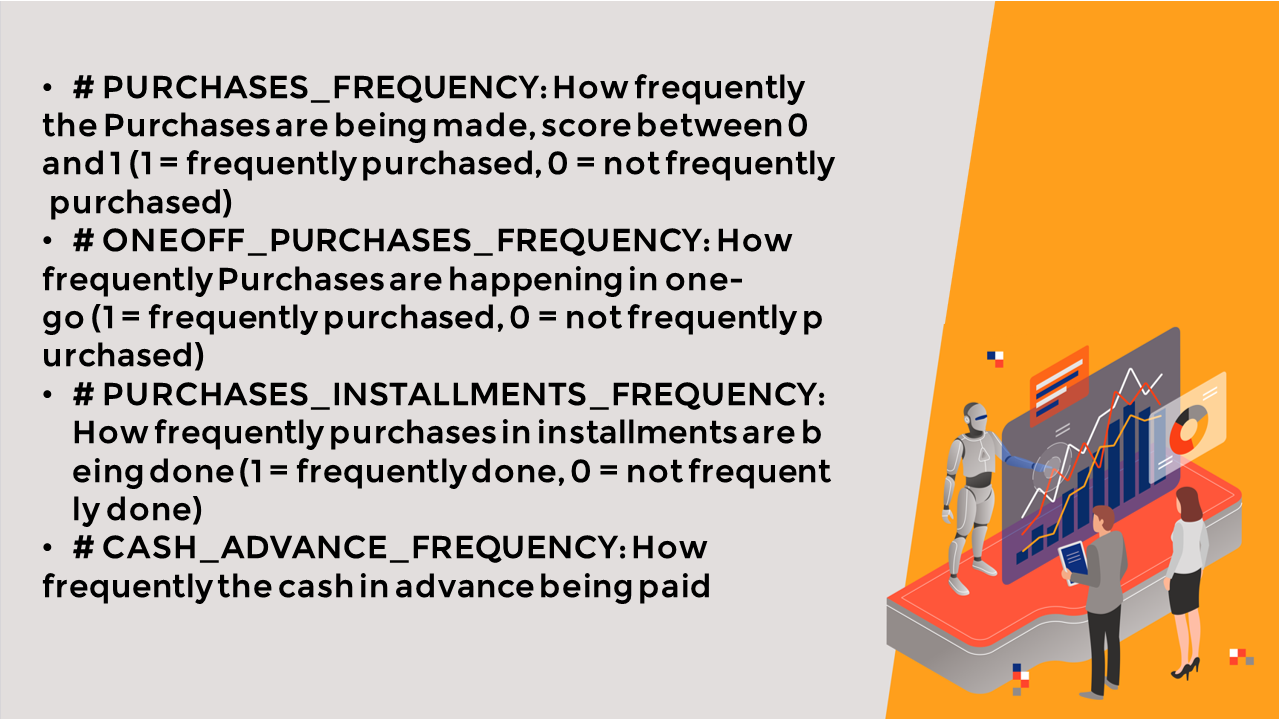

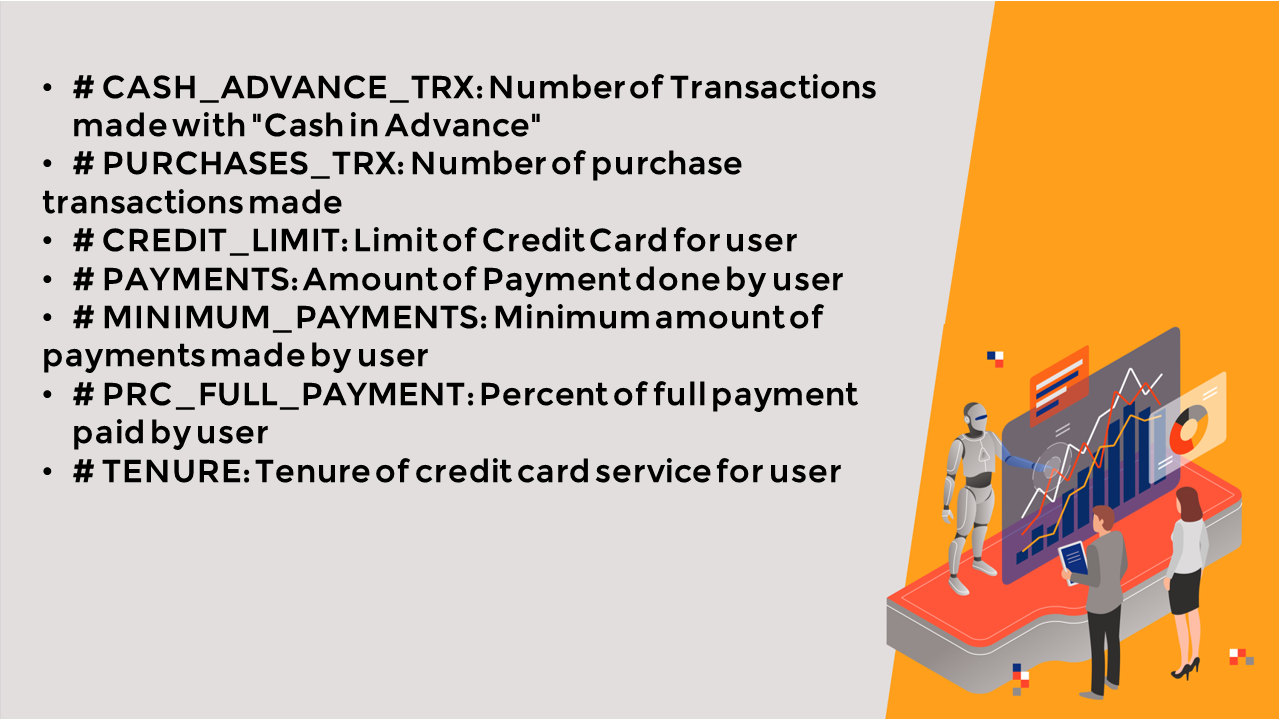

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [4]:
creditcard_df = pd.read_csv('Marketing_data.csv')

In [6]:
# You have to include the full link to the csv file containing your dataset

creditcard_df

# CUSTID: Identification of Credit Card holder
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [9]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
creditcard_df.describe()

# Mean balance is $1564
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [12]:
# Let's see who made one off purchase of $40761!
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [14]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [13]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full

creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# TASK #3: VISUALIZE AND EXPLORE DATASET

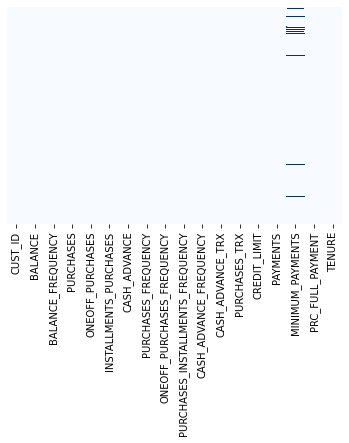

In [ ]:
# Let's see if we have any missing data, luckily we don't!


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT'


In [ ]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT'


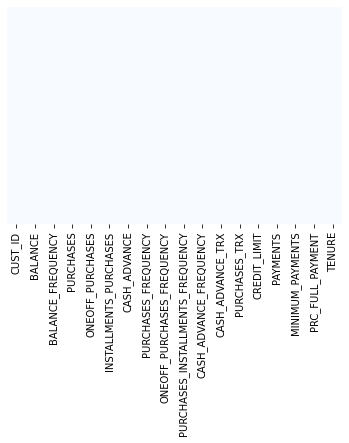

In [ ]:
# Let's see if we have duplicated entries in the data


0

In [ ]:
# Let's drop Customer ID since it has no meaning here


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


17

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

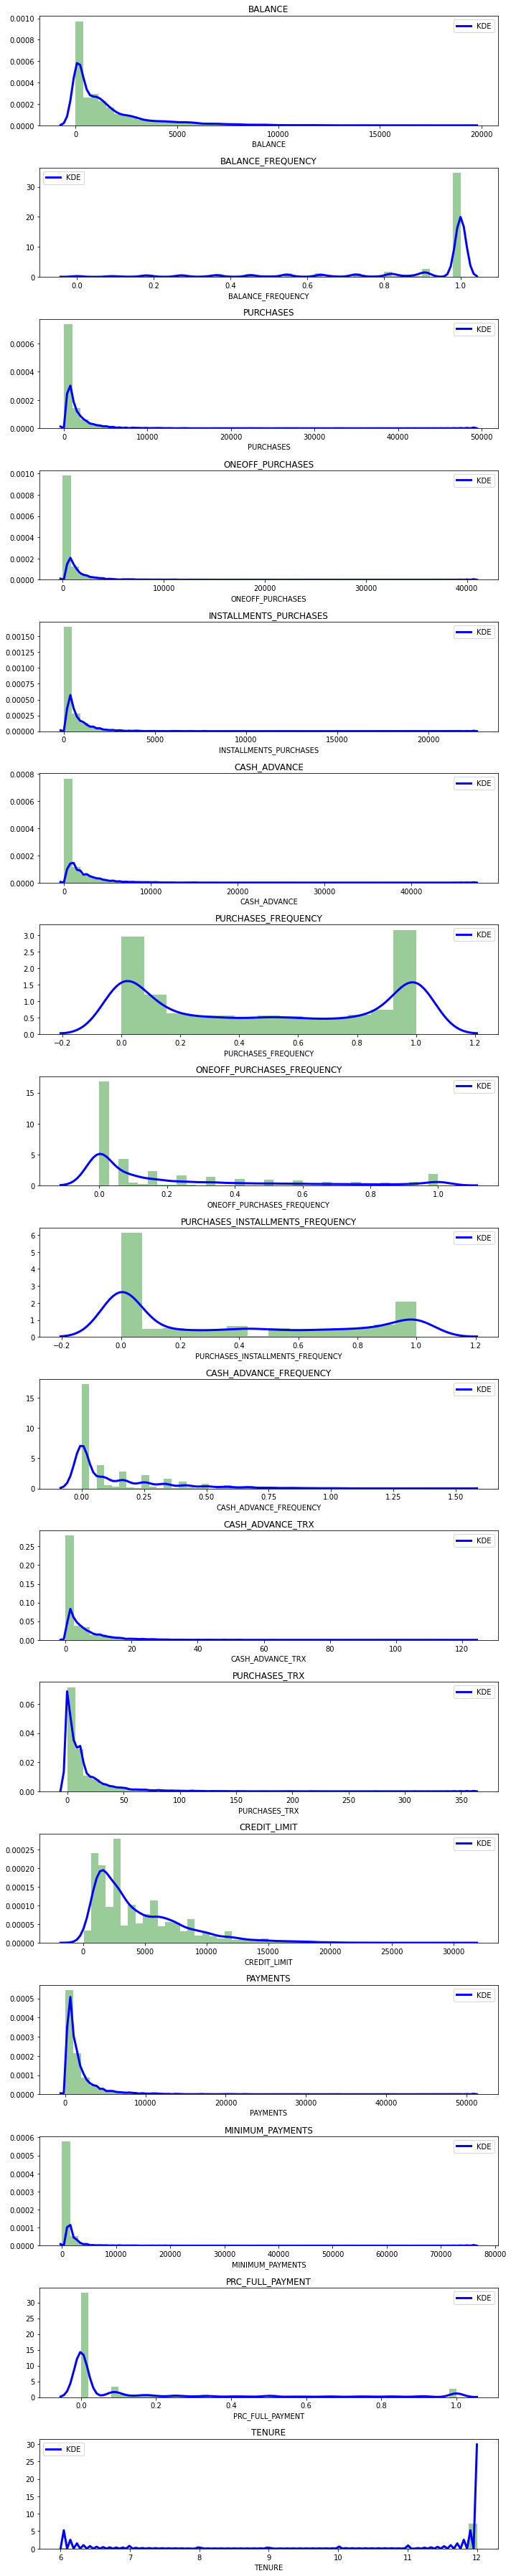

In [ ]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable.
# KDE demonstrates the probability density at different values in a continuous variable.

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure


In [ ]:
# sns.pairplot(creditcard_df)
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'


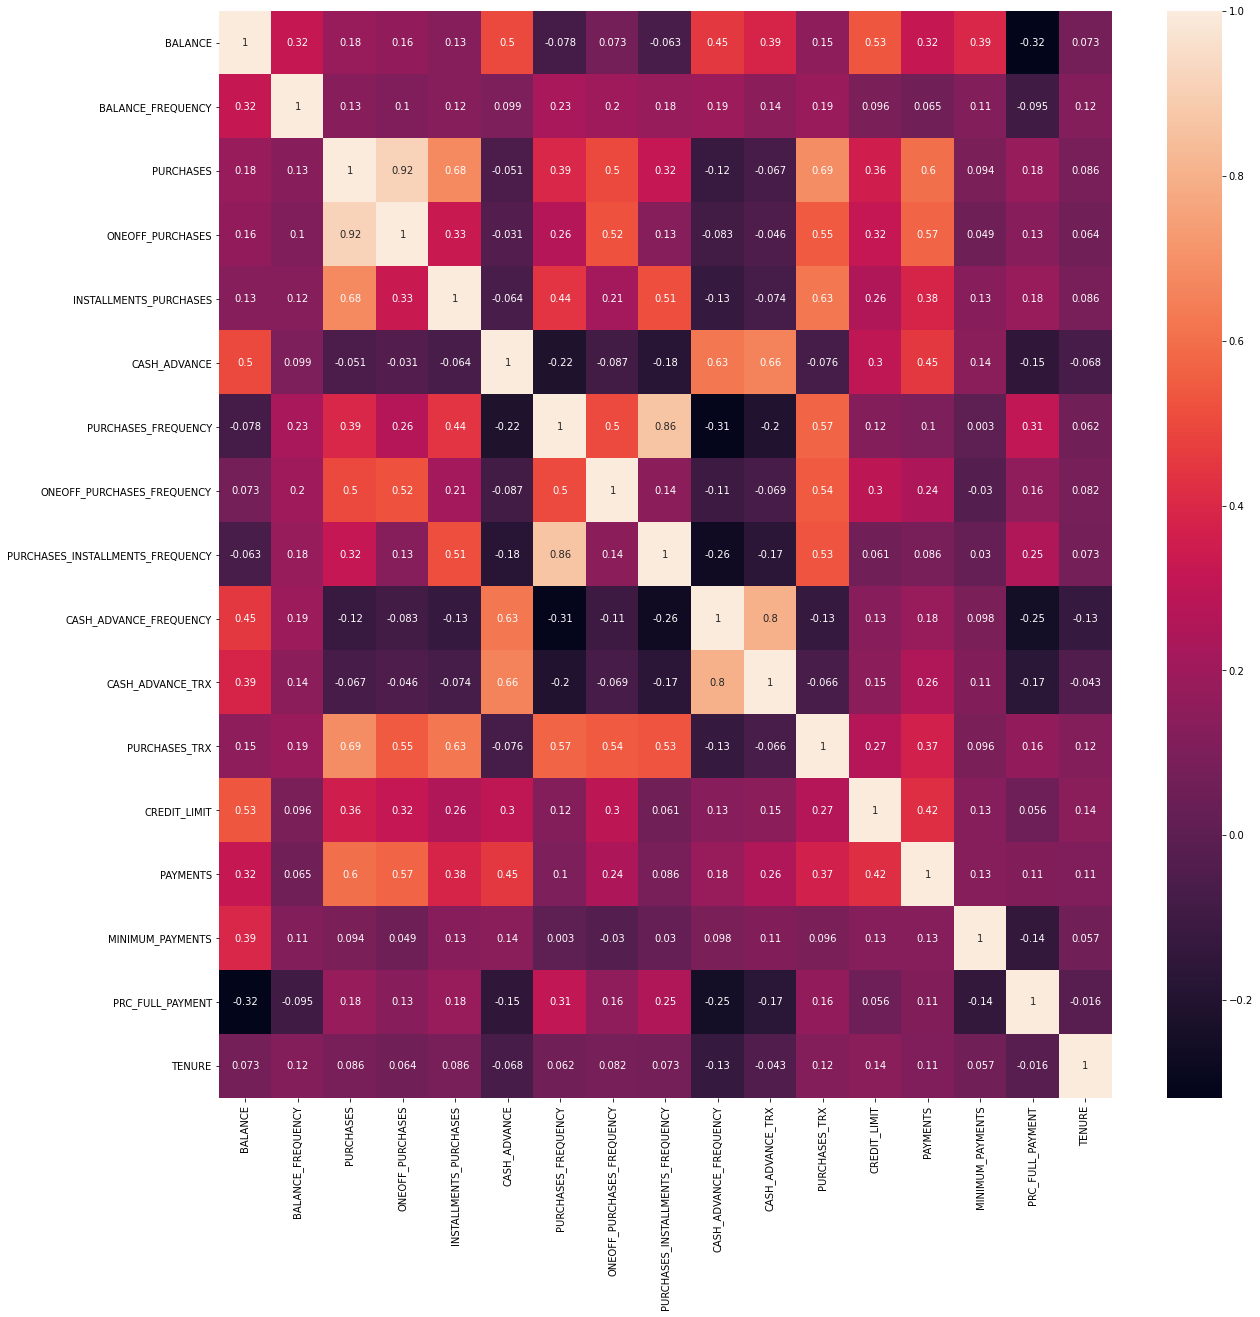

In [ ]:

# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments.
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


# TASK #4: UNDERSTAND THE THEORY AND INTUITON BEHIND K-MEANS

![alt text](https://drive.google.com/uc?id=1EBCmP06GuRjVfPgTfH85Yhv9xIAZUj-K)

![alt text](https://drive.google.com/uc?id=1EYWyoec9Be9pYkOaJTjPooTPWgRlJ_Xz)

![alt text](https://drive.google.com/uc?id=1ppL-slQPatrmHbPBEaT3-8xNH01ckoNE)

![alt text](https://drive.google.com/uc?id=1Yfi-dpWW3keU5RLgwAT4YmQ2rfY1GxUh)

![alt text](https://drive.google.com/uc?id=1bLRDIZRda0NSTAdcbugasIjDjvgw4JIU)

![alt text](https://drive.google.com/uc?id=1rBQziDU0pS1Fz0m8VQRjQuBoGFSX1Spb)

![alt text](https://drive.google.com/uc?id=1BOX2q8R_8E4Icb4v1tpn1eymCTJY2b5o)

![alt text](https://drive.google.com/uc?id=1v7hJEPiigSeTTaYo0djbO-L4uEnTpcAU)

# TASK #5: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [ ]:
# Let's scale the data first


(8950, 17)

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

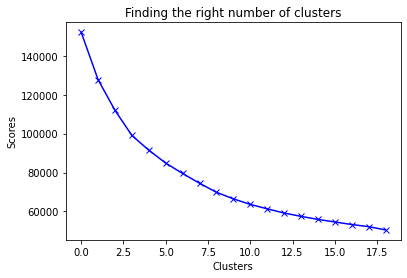

In [ ]:

# From this we can observe that, 4th cluster seems to be forming the elbow of the curve.
# However, the values does not reduce linearly until 8th cluster.
# Let's choose the number of clusters to be 7.

# TASK #6: APPLY K-MEANS METHOD

(8, 17)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.334592,-0.350524,-0.288489,-0.214652,-0.287412,0.067364,-0.204978,-0.287181,-0.226363,0.308493,0.000348,-0.388193,-0.562451,-0.393054,-0.208753,0.012516,-3.199775
1,-0.000143,0.402998,-0.355314,-0.239777,-0.399511,-0.107629,-0.845323,-0.388037,-0.751763,0.084674,-0.041222,-0.479310,-0.314354,-0.255132,-0.014303,-0.455674,0.273683
2,1.663126,0.397000,-0.221470,-0.158717,-0.232144,1.959711,-0.480154,-0.213367,-0.418604,1.885185,1.878349,-0.270699,1.015004,0.783797,0.538086,-0.395533,0.080053
3,-0.361106,0.334261,-0.032793,-0.241412,0.365786,-0.361969,0.997638,-0.381214,1.209824,-0.472432,-0.359482,0.194325,-0.259151,-0.213472,-0.029925,0.313594,0.255895
4,1.043133,0.464248,2.523760,1.824928,2.614721,-0.160514,1.163298,1.571840,1.269218,-0.286407,-0.149504,3.139371,1.303979,1.451819,0.565614,0.262823,0.337195
5,-0.139070,0.401198,0.549618,0.678519,0.052819,-0.333561,0.989143,1.916897,0.181229,-0.414824,-0.333237,0.629413,0.438283,0.147957,-0.160222,0.455112,0.268286
6,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409
7,-0.700773,-2.139360,-0.309559,-0.234419,-0.301166,-0.320500,-0.552479,-0.441283,-0.437591,-0.521542,-0.376440,-0.417721,-0.174039,-0.191633,-0.256692,0.290240,0.202901


In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation


# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,868.050123,0.794235,386.843712,236.159280,151.164432,1120.136414,0.408083,0.116786,0.274475,0.196877,3.251200,5.060800,2448.023119,595.290996,377.716763,0.157375,7.235200
1,1564.176628,0.972737,244.071551,194.457004,49.795161,753.167599,0.151082,0.086699,0.065667,0.152088,2.967518,2.795985,3350.699513,994.561411,830.874342,0.020438,11.883577
2,5026.130880,0.971316,530.030936,329.000066,201.142841,5088.476111,0.297642,0.138806,0.198074,0.512389,16.067181,7.981278,8187.449940,4002.159726,2118.192815,0.038028,11.624449
3,812.862850,0.956454,933.141885,191.742829,741.843252,219.805531,0.890751,0.088734,0.845253,0.040606,0.795624,19.540030,3551.551567,1115.161931,794.468077,0.245435,11.859771
4,3735.668972,0.987247,6395.257057,3621.444229,2775.527114,642.265584,0.957238,0.671368,0.868857,0.077831,2.228571,92.742857,9238.857143,5936.017417,2182.346581,0.230586,11.968571
5,1275.012133,0.972311,2177.471345,1718.639982,458.831363,279.379053,0.887341,0.774305,0.436462,0.052134,0.974729,30.354693,6089.104037,2161.464353,490.815466,0.286827,11.876354
6,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
7,105.874041,0.370476,341.826453,203.350329,138.726799,306.767500,0.268614,0.070815,0.190528,0.030778,0.679899,4.326858,3861.224193,1178.384152,265.997091,0.238605,11.788851


(8950,)

7

0

array([3, 2, 7, ..., 4, 4, 4], dtype=int32)

In [ ]:
# concatenate the clusters labels to our original dataframe




,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


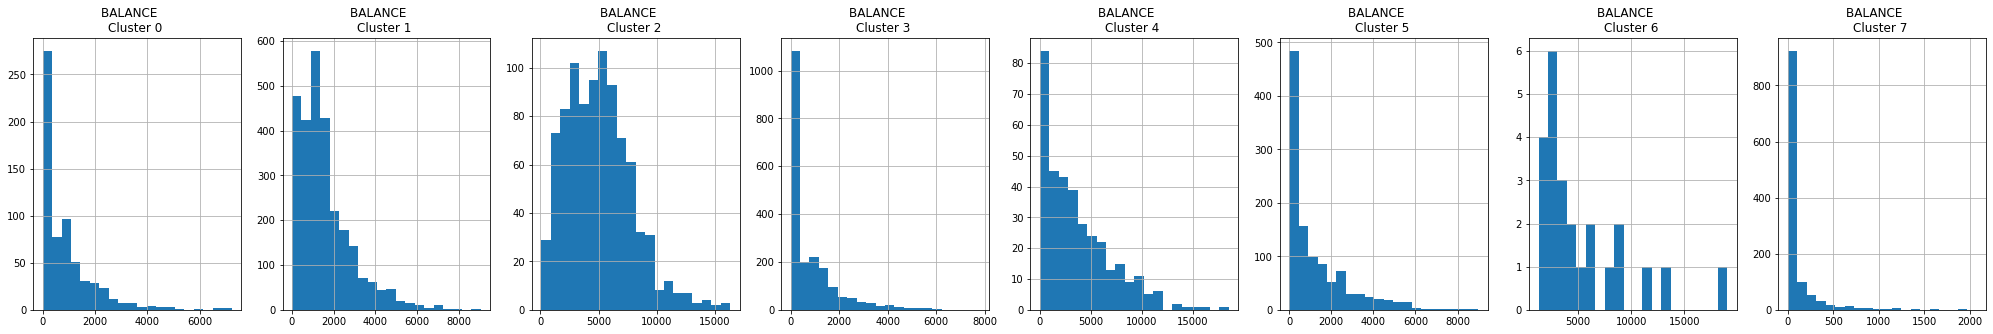

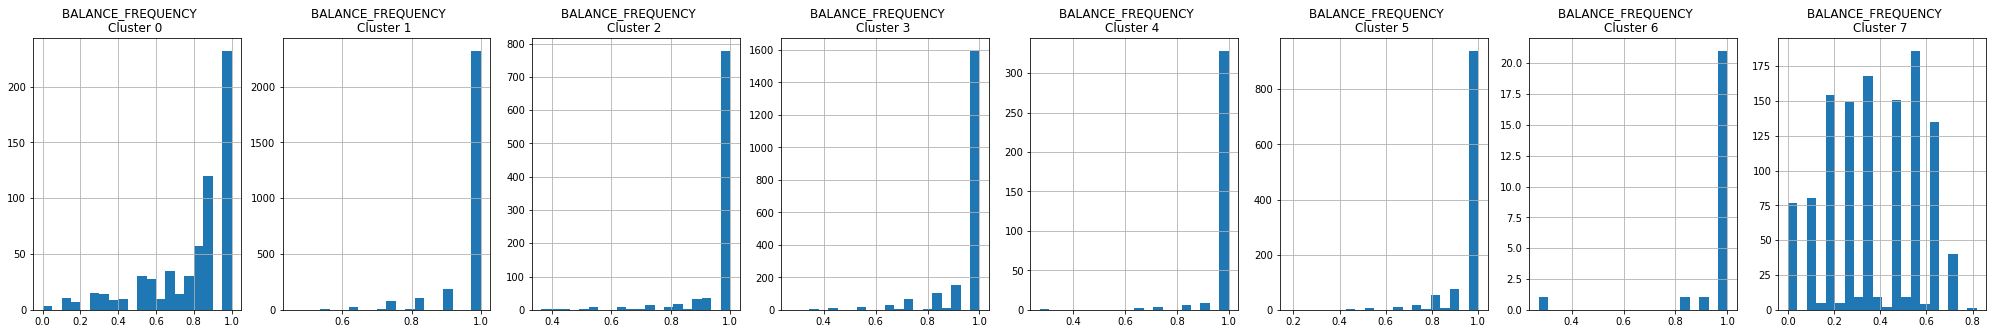

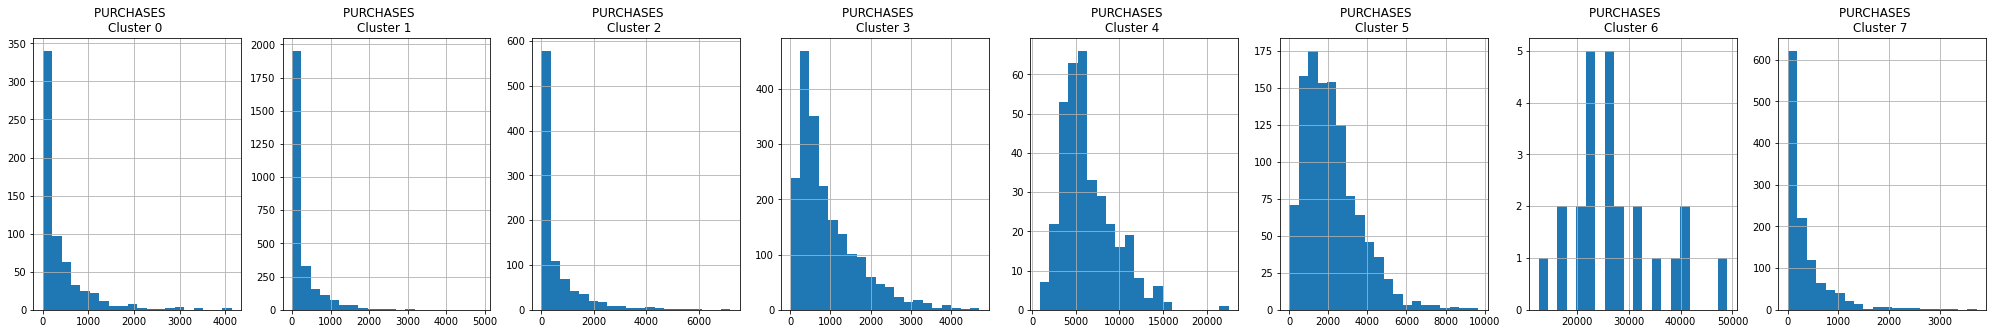

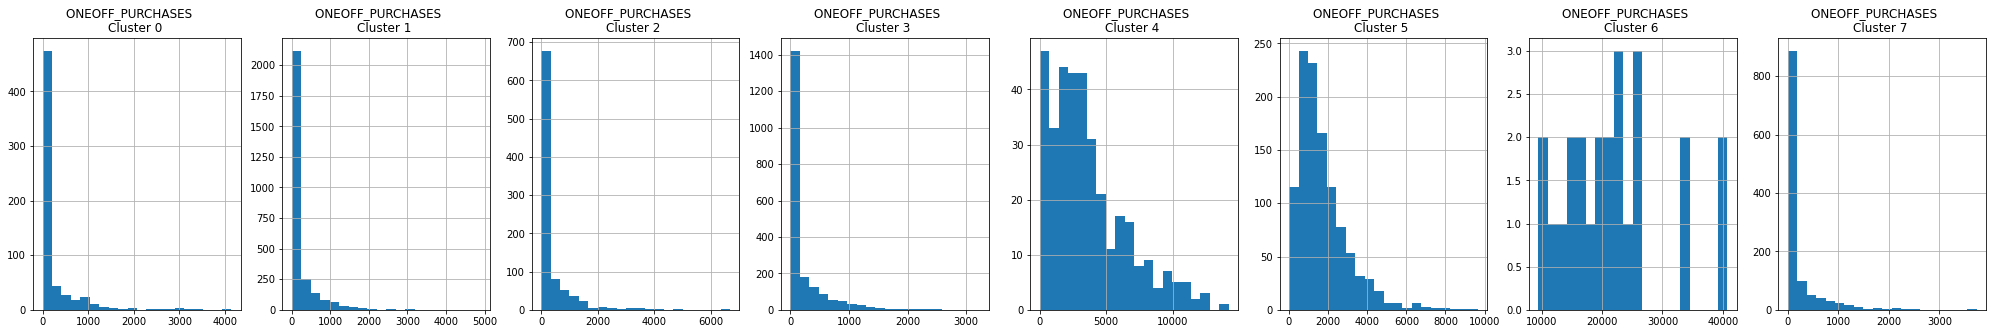

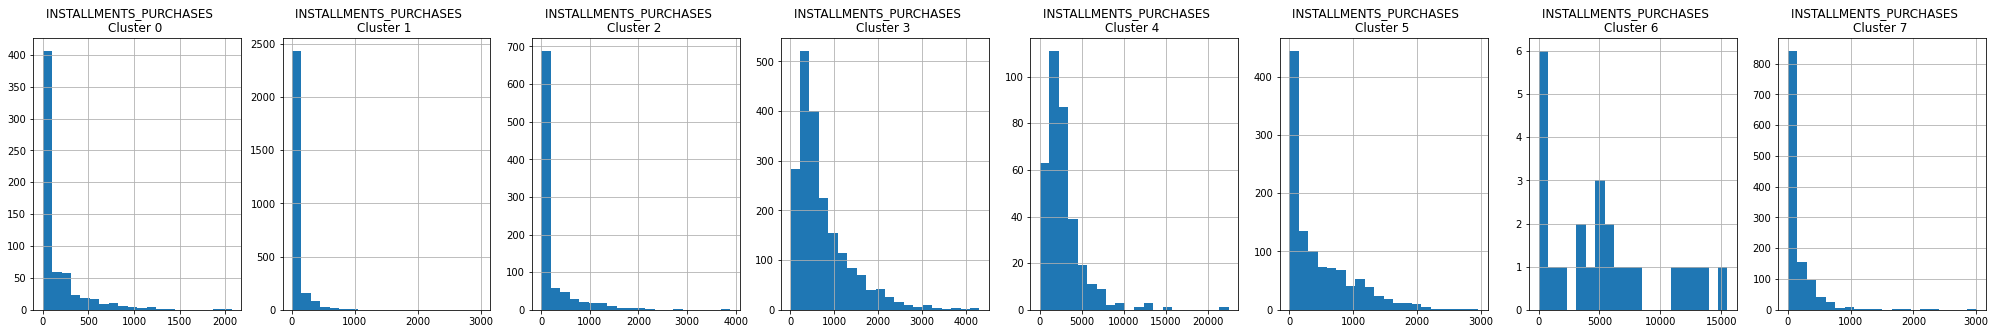

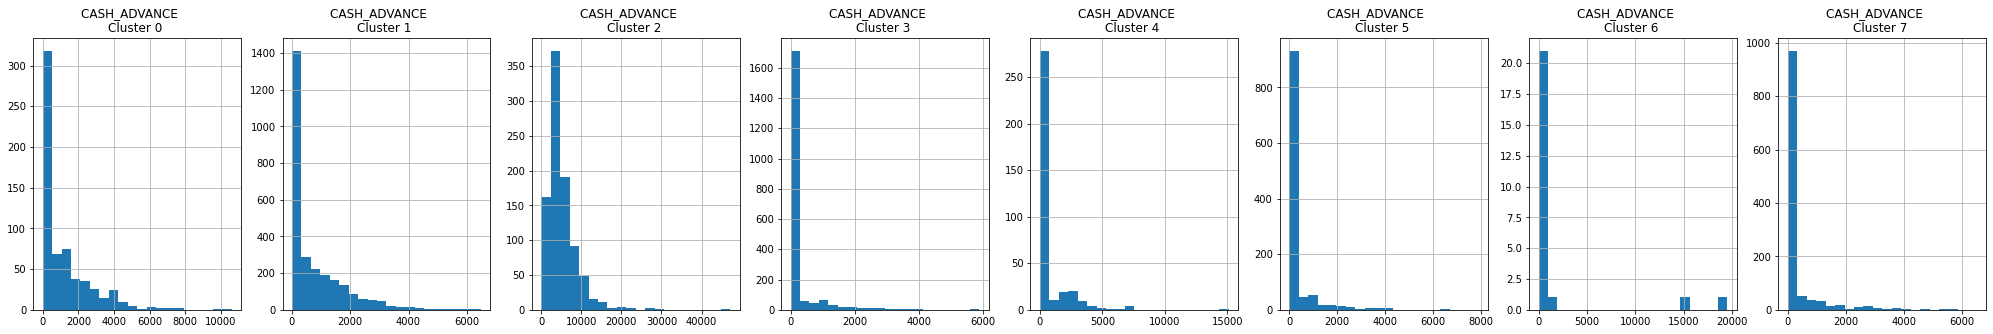

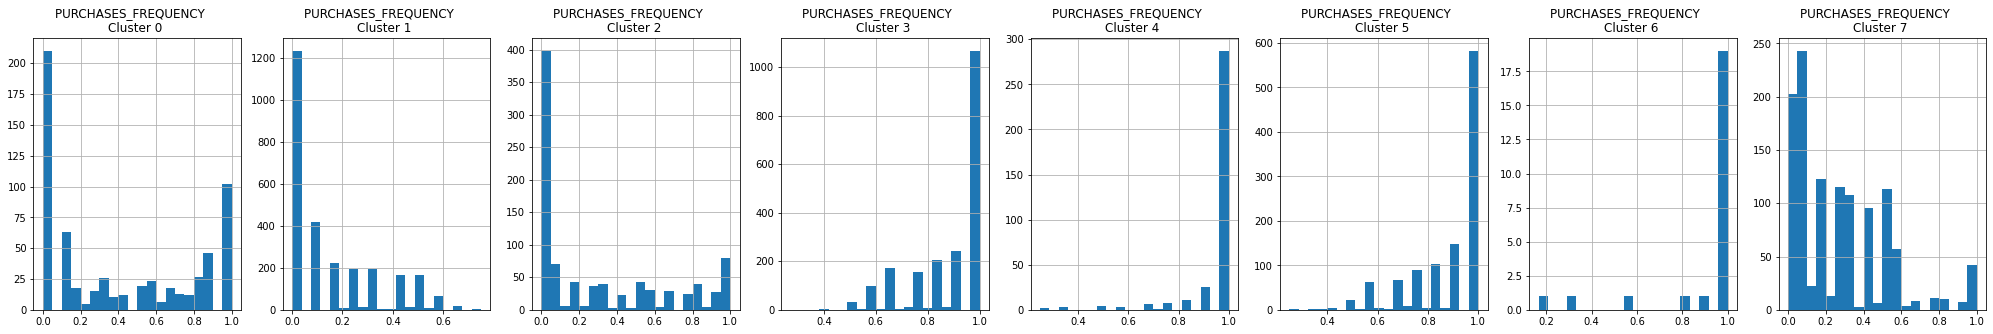

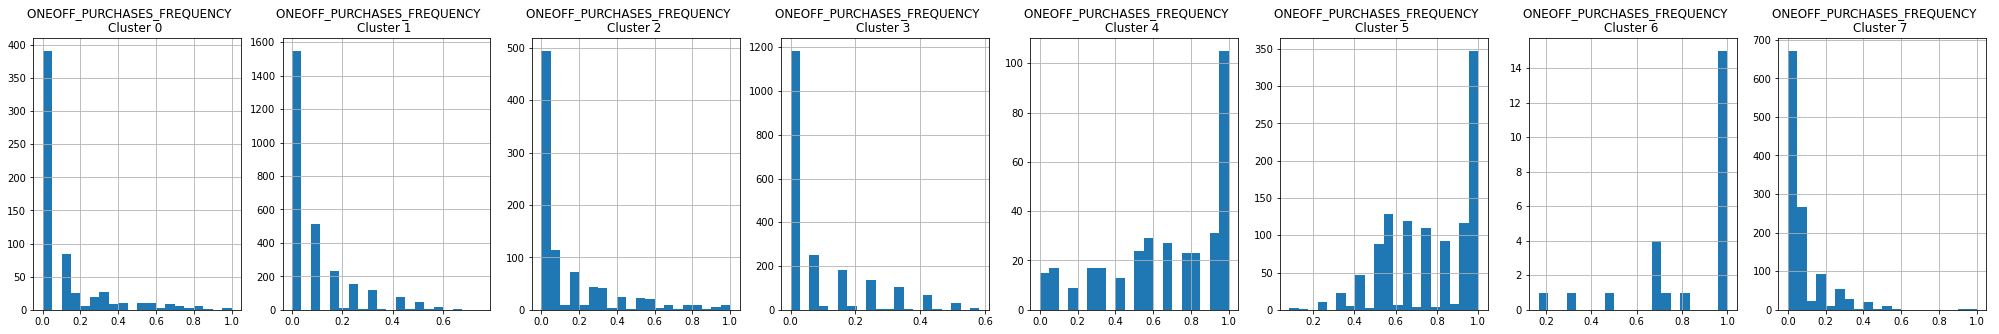

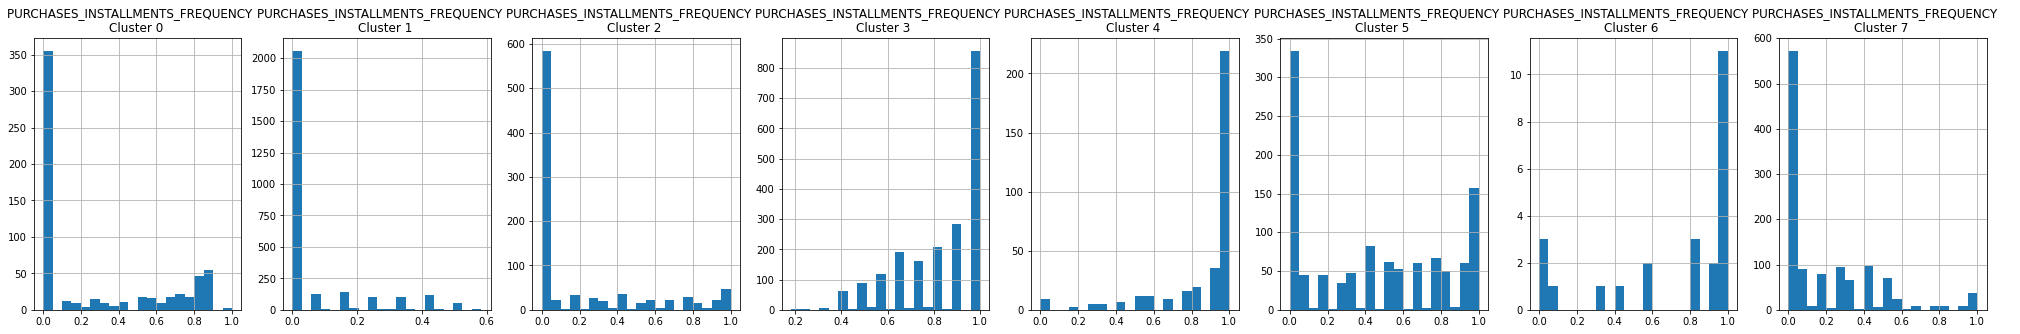

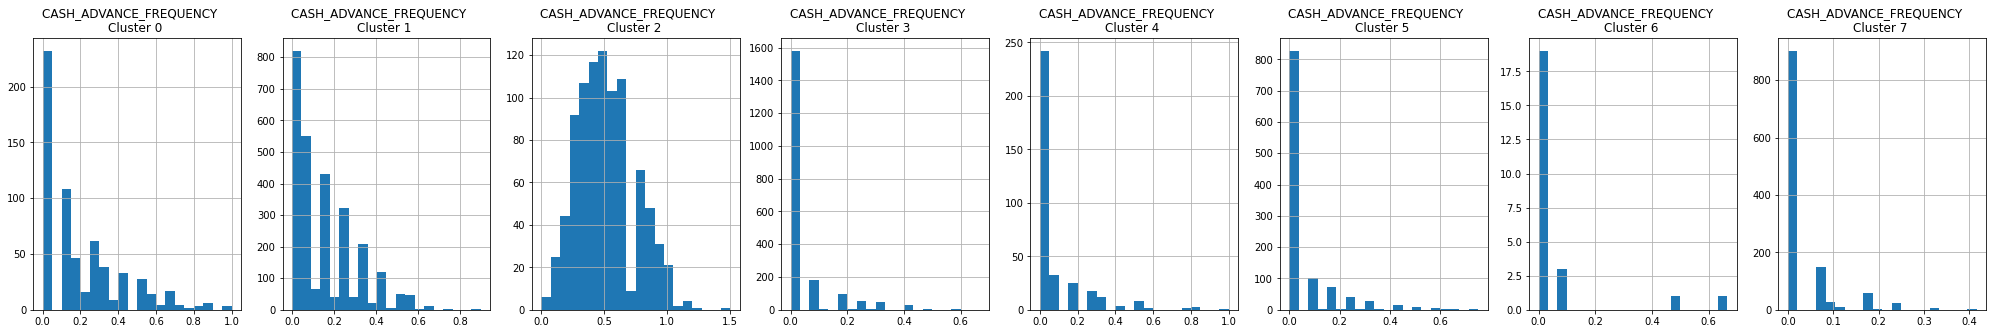

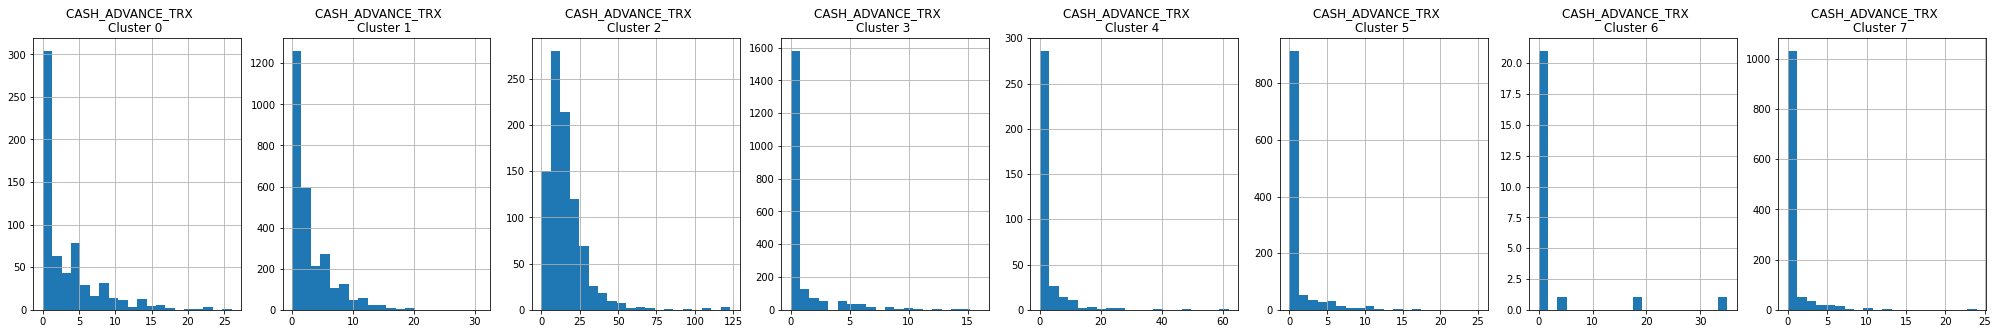

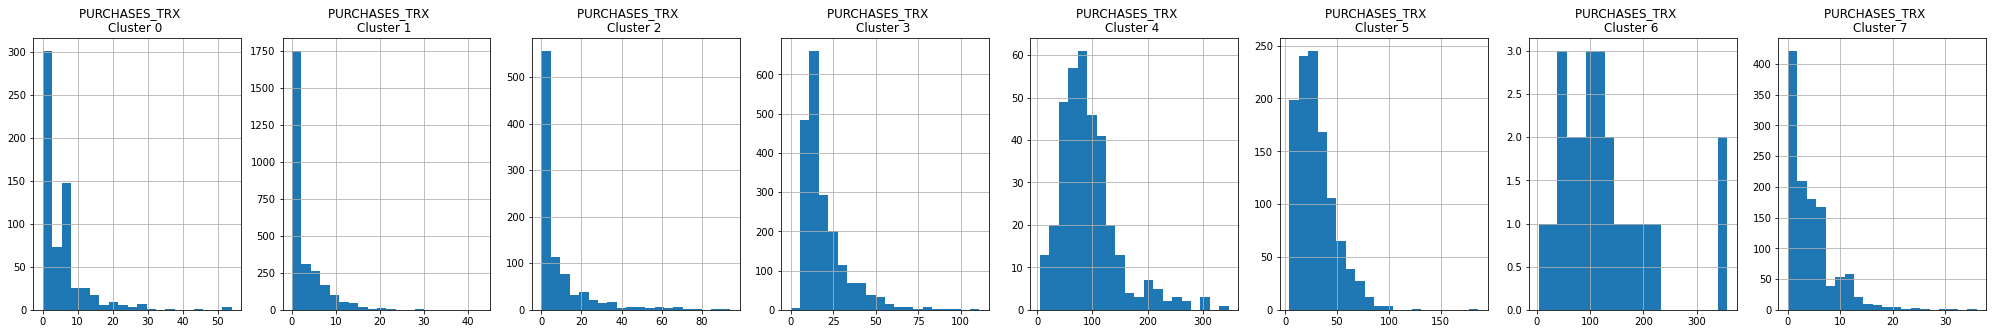

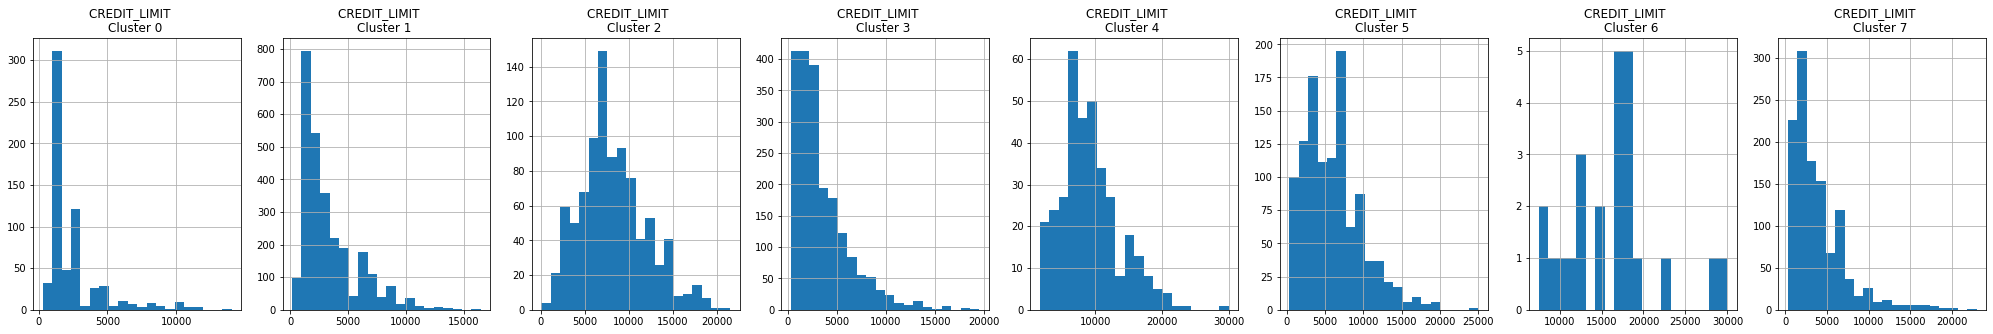

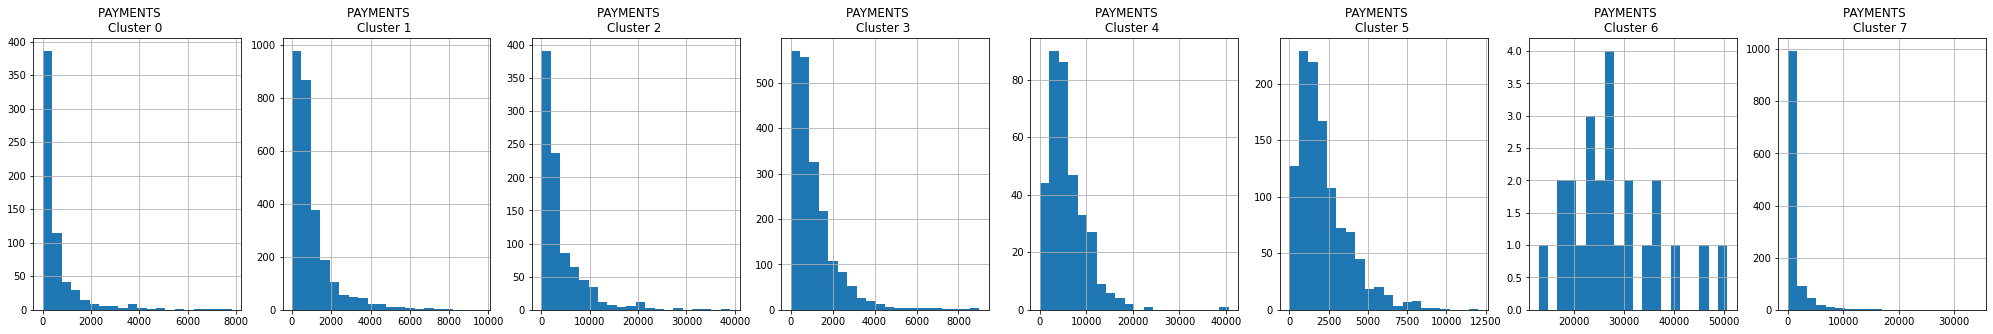

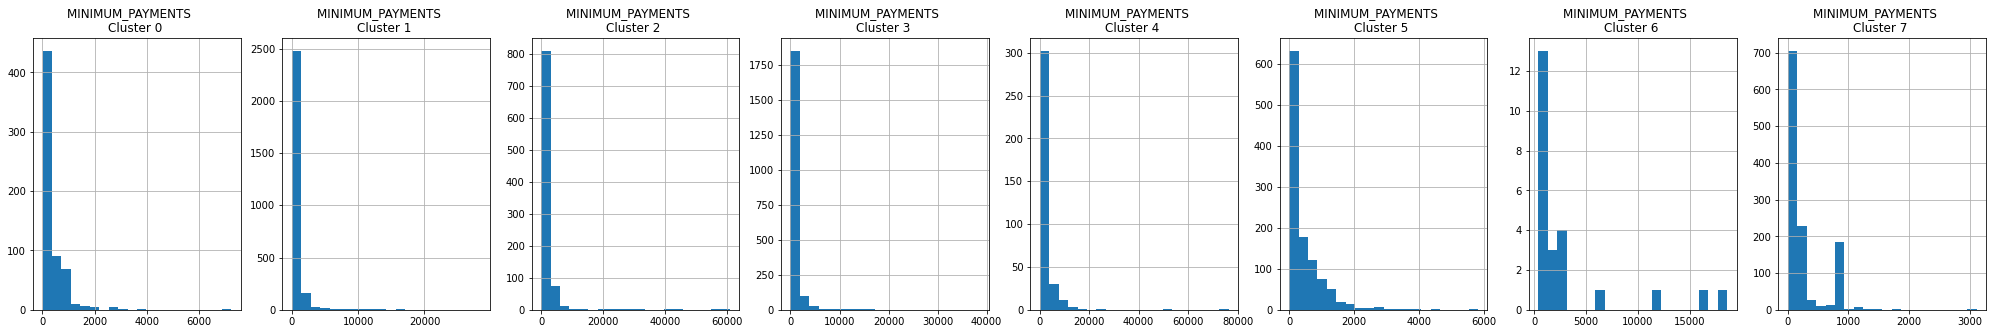

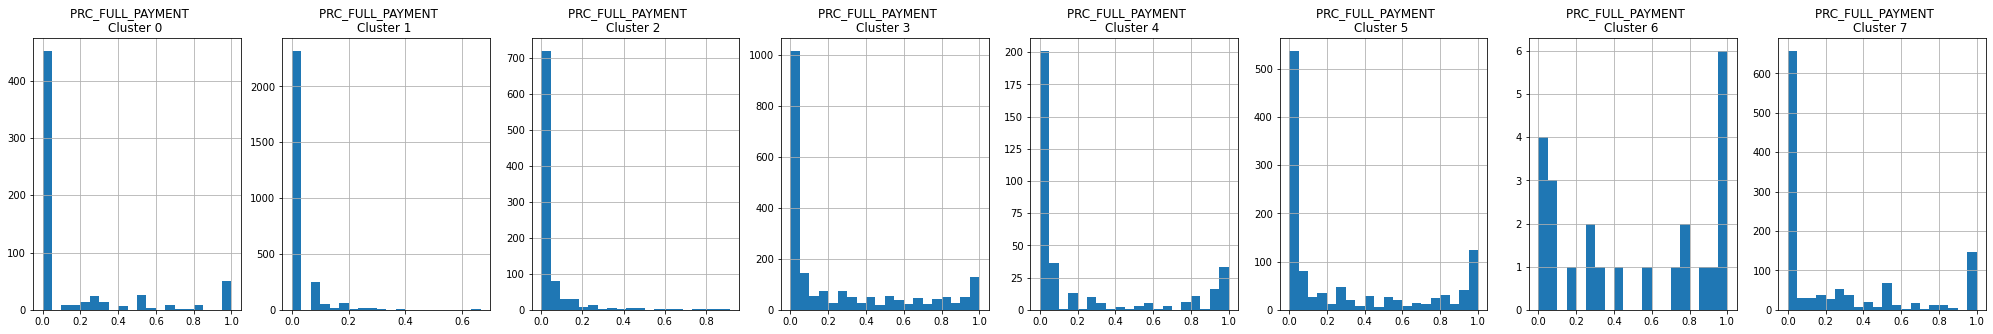

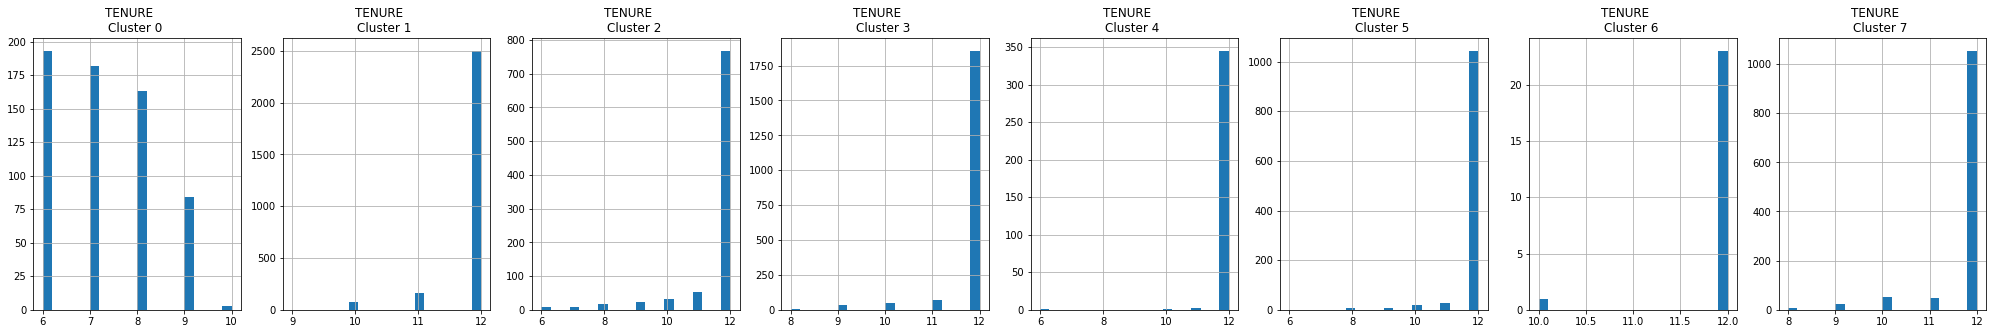

In [ ]:
# Plot the histogram of various clusters


# TASK 7: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

![alt text](https://drive.google.com/uc?id=1xDuvEnbuNqIjX5Zng39TCfGCf-BBDGf0)

In [ ]:
# Obtain the principal components


array([[-1.68222007, -1.07644301],
       [-1.13828642,  2.50648729],
       [ 0.9696818 , -0.38352021],
       ...,
       [-0.9262067 , -1.81077965],
       [-2.33655443, -0.65796819],
       [-0.55642225, -0.4004878 ]])

In [ ]:
# Create a dataframe with the two components


,pca1,pca2
0,-1.682220,-1.076443
1,-1.138286,2.506487
2,0.969682,-0.383520
3,-0.873626,0.043176
4,-1.599435,-0.688575


In [ ]:
# Concatenate the clusters labels to the dataframe


,pca1,pca2,cluster
0,-1.682220,-1.076443,1
1,-1.138286,2.506487,2
2,0.969682,-0.383520,5
3,-0.873626,0.043176,1
4,-1.599435,-0.688575,1


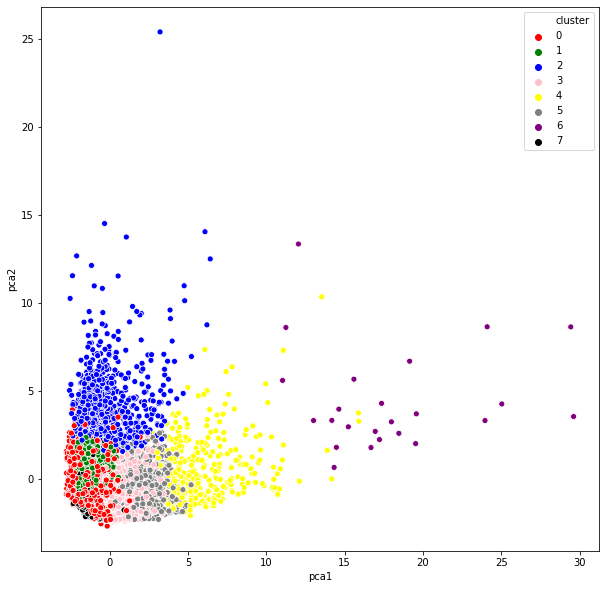

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

![alt text](https://drive.google.com/uc?id=1g0tWKogvKaCrtsfzjApi6m8yGD3boy4x)

![alt text](https://drive.google.com/uc?id=1AcyUL_F9zAD2--Hmyq9yTkcA9mC6-bwg)

![alt text](https://drive.google.com/uc?id=1xk1D5uldId0DWywRJ3-OAVBcIr5NGCq_)

# TASK #9: APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

(8950, 17)

Epoch 1/25
70/70 [==============================] - 4s 57ms/step - loss: 0.4943
Epoch 2/25
70/70 [==============================] - 4s 57ms/step - loss: 0.2985
Epoch 3/25
70/70 [==============================] - 4s 56ms/step - loss: 0.2192
Epoch 4/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1879
Epoch 5/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1729
Epoch 6/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1595
Epoch 7/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1395
Epoch 8/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1300
Epoch 9/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1157
Epoch 10/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1067
Epoch 11/25
70/70 [==============================] - 4s 56ms/step - loss: 0.0907
Epoch 12/25
70/70 [==============================] - 4s 56ms/step - loss: 0.0884
Epoch 13/25
70/70 [==================

(8950, 10)

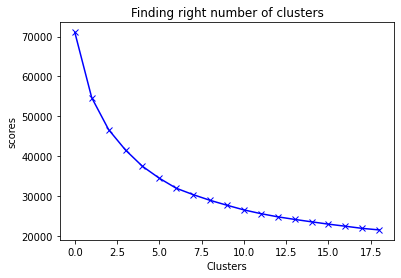

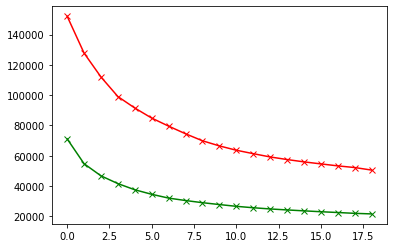

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


,pca1,pca2
0,-1.682221,-1.076451
1,-1.138299,2.506482
2,0.969680,-0.383501
3,-0.873630,0.043168
4,-1.599433,-0.688583


,pca1,pca2,cluster
0,-1.682221,-1.076451,3
1,-1.138299,2.506482,3
2,0.969680,-0.383501,3
3,-0.873630,0.043168,2
4,-1.599433,-0.688583,3


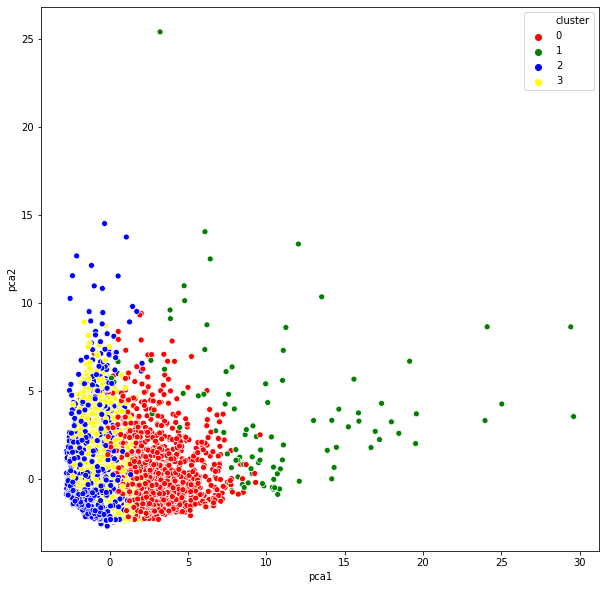

# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS